# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('loan_data.csv')
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


C:\Users\preze\AppData\Local\Temp\ipykernel_51228\3647170869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby(['AgeGroup', 'loan_status']).size().unstack()


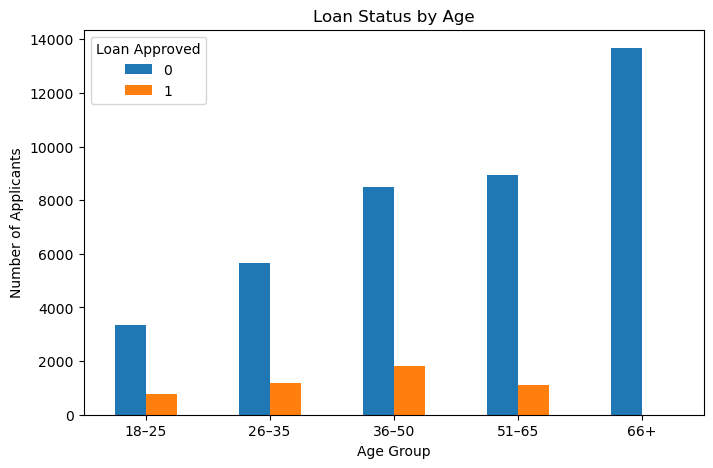

loan_status      0     1
AgeGroup                
18–25         3357   769
26–35         5664  1192
36–50         8479  1828
51–65         8931  1104
66+          13676     0


In [68]:
df['AgeGroup'] = pd.cut(df['person_age'], bins=[18, 25, 35, 50, 65, 90], labels=['18–25','26–35','36–50','51–65','66+'])
age_counts = df.groupby(['AgeGroup', 'loan_status']).size().unstack()
age_counts.plot(kind='bar', figsize=(8,5))

plt.title("Loan Status by Age")
plt.xlabel("Age Group")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show() 
print(age_counts)

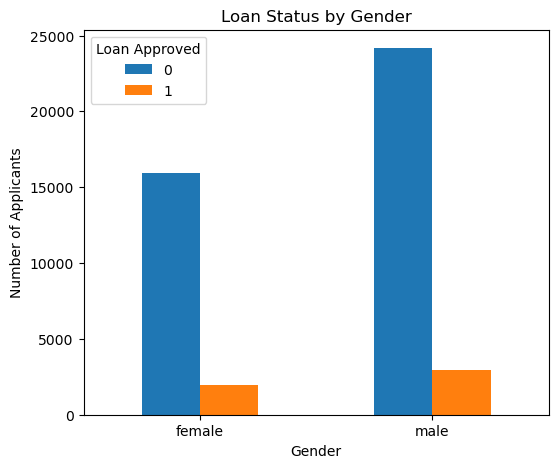

loan_status        0     1
person_gender             
female         15934  1975
male           24173  2918


In [69]:
gender_counts = df.groupby(['person_gender', 'loan_status']).size().unstack()
gender_counts.plot(kind='bar', figsize=(6,5))

plt.title("Loan Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(gender_counts)

C:\Users\preze\AppData\Local\Temp\ipykernel_51228\367628652.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_counts = df.groupby(['IncomeGroup', 'loan_status']).size().unstack()


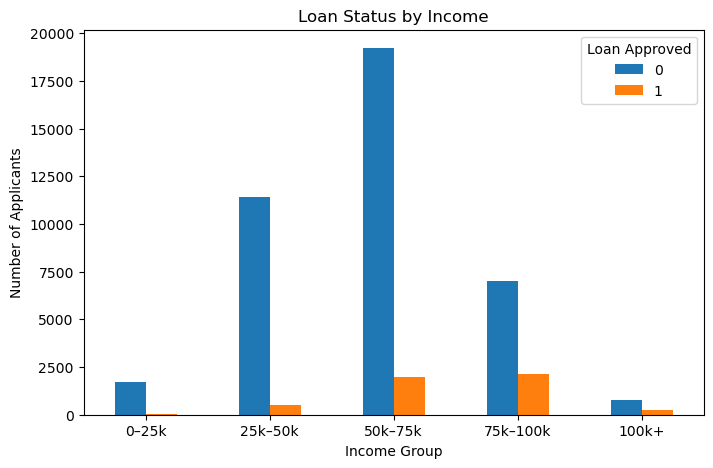

loan_status      0     1
IncomeGroup             
0–25k         1738    30
25k–50k      11397   490
50k–75k      19216  1979
75k–100k      6993  2121
100k+          763   273


In [70]:
df['IncomeGroup'] = pd.cut(df['person_income'], bins=[0, 25000, 50000, 75000, 100000, 200000], labels=['0–25k','25k–50k','50k–75k','75k–100k','100k+'])


income_counts = df.groupby(['IncomeGroup', 'loan_status']).size().unstack()


income_counts.plot(kind='bar', figsize=(8,5))

plt.title("Loan Status by Income")
plt.xlabel("Income Group")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(income_counts)

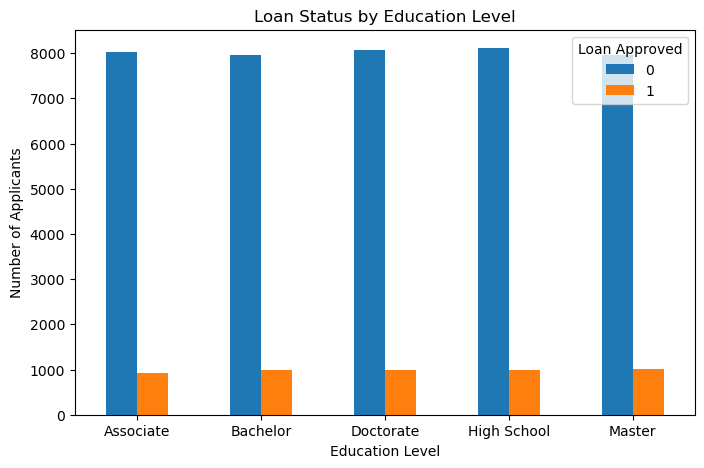

loan_status          0     1
person_education            
Associate         8016   922
Bachelor          7963   988
Doctorate         8068   992
High School       8112   990
Master            7948  1001


In [73]:
education_counts = df.groupby(['person_education', 'loan_status']).size().unstack()
education_counts.plot(kind='bar', figsize=(8,5))

plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(education_counts)

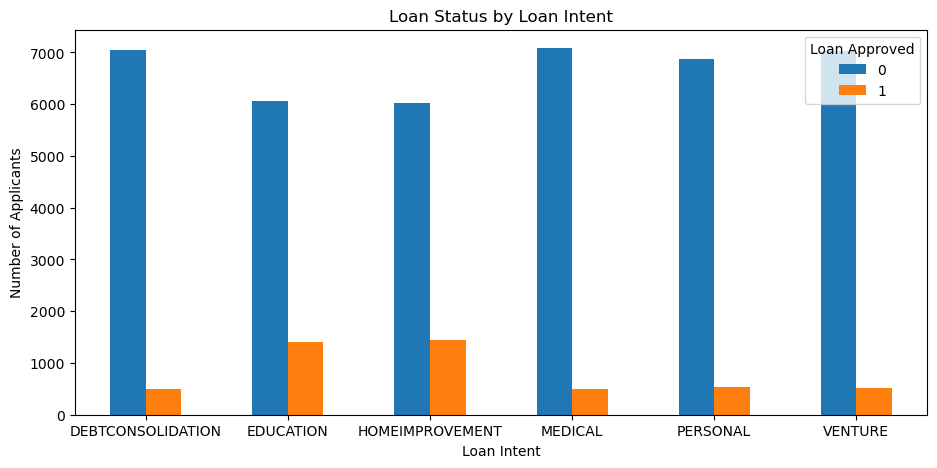

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  7038   502
EDUCATION          6062  1397
HOMEIMPROVEMENT    6018  1448
MEDICAL            7085   493
PERSONAL           6867   544
VENTURE            7037   509


In [71]:
intent_counts = df.groupby(['loan_intent', 'loan_status']).size().unstack()
intent_counts.plot(kind='bar', figsize=(11,5))

plt.title("Loan Status by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(intent_counts)

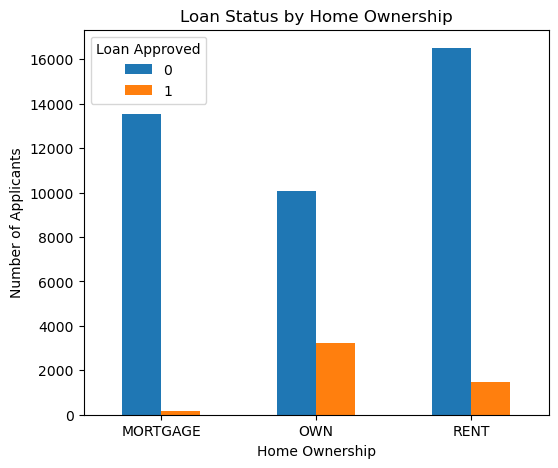

loan_status                0     1
person_home_ownership             
MORTGAGE               13553   179
OWN                    10052  3235
RENT                   16502  1479


In [72]:
ownership_counts = df.groupby(['person_home_ownership', 'loan_status']).size().unstack()
ownership_counts.plot(kind='bar', figsize=(6,5))

plt.title("Loan Status by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(ownership_counts)

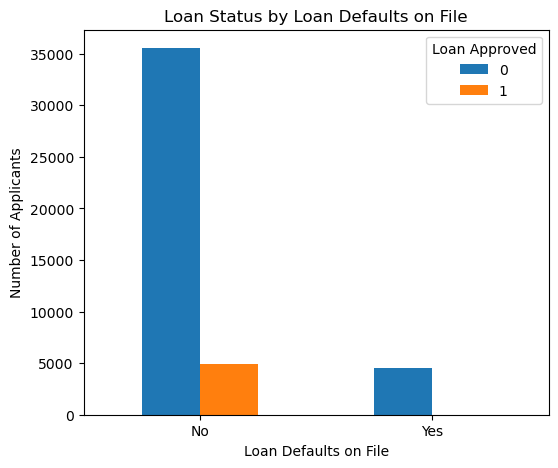

loan_status                           0       1
previous_loan_defaults_on_file                 
No                              35556.0  4893.0
Yes                              4551.0     NaN


In [63]:
default_counts = df.groupby(['previous_loan_defaults_on_file', 'loan_status']).size().unstack()
default_counts.plot(kind='bar', figsize=(6,5))

plt.title("Loan Status by Loan Defaults on File")
plt.xlabel("Loan Defaults on File")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Approved", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()
print(default_counts)

    Which features seem to drive the model's decision to grant a loan?
The feature that seems to drive the model's decion to grant a loan the most would be how likely the bank is to see a return of investment on that potential loan. For instance, as shown in the "Loan Status by Age" graph, the higher the age of the individual, the more likely they are to be granted a loan. However, past the 66+ mark, in which most people retire and live off of pension, the institution will not give out this loan as it would be considered "too risky" as the return on investment is less likely to occur. Moreover, people that defaulted on their loans weren't approved at all, hinting at the "risk" of that loan being high enough to automatically reject those applicants. Finally, the last two graphs I'll reference: "Loan Status by Home Ownership" and "Loan Status by Loan Intent" show that applicants that are continuing higher educations and/or own a house are considered the most financially "stable" and as such, are the most likely to recieve a loan from this ai model. 

    Which seem unrelated?
The features that seem unrelated to whether or not a loan is granted would be gender, in which the ratio of applied applicants to accepted applicants remained relative for each group; and education level, in which each group were considered "safe" due to recieving a higher education, making the institution's return on investment much more statistically likely. 

    Should the financial institution be concerned about potential legal trouble?
The financial institution is not likely to get into legal trouble, the model is following trends in ways similar to how a person would decide to grant applicants a loan. I.e.- granting them to applicants that are the most likely to be able to pay back said loan on time and without trouble, which the algorithm is able to do fairly. The institution is no more likely to get into legal issues over an employee than with this model. 